# This is an example on applying function on the indexed column when performing group by.

In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


people = pd.DataFrame(np.random.randn(5, 5), columns=['a', 'b', 'c', 'd', 'e'], index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])


people

,a,b,c,d,e
Joe,1.102469,-0.375270,-1.877891,-0.830124,0.731230
Steve,-0.068635,1.340059,0.637819,0.394635,-0.919881
Wes,-0.684762,-0.132517,0.029793,-0.233253,-0.678632
Jim,0.614029,-1.600583,-0.110744,0.372384,0.752898
Travis,0.430859,-1.253869,-2.023228,-1.100134,-0.291610


In [5]:
def GroupFunc(x):
    if len(x) > 3:
        return 'Group1'
    else:
        return 'Group2'

people.groupby(GroupFunc).sum()

,a,b,c,d,e
Group1,0.754566,0.178533,1.398859,0.882267,-2.209069
Group2,-0.633834,0.061672,-1.002676,1.716660,1.109107


In [13]:
people.groupby(people.a > 1)

In [7]:
people.groupby(people.a > 1).sum()

,a,b,c,d,e
a,,,,,
False,-0.538189,0.597979,1.414481,-2.404003,-1.328961
True,1.836648,-0.222735,-1.230161,2.024694,0.591691


In [16]:
def GroupColFunc(df, ind, col):
    if df[col].loc[ind] > 1:
        return 'Group1'
    else:
        return 'Group2'

In [17]:
people.groupby(lambda x: GroupColFunc(people, x, 'a')).sum()

,a,b,c,d,e
Group1,1.836648,-0.222735,-1.230161,2.024694,0.591691
Group2,-0.538189,0.597979,1.414481,-2.404003,-1.328961


# Exercise of group on Pandas tutorial

http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [19]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})


In [20]:
df

,A,B,C,D
0,foo,one,-0.795511,0.066011
1,bar,one,1.295024,0.575183
2,foo,two,-1.305309,-2.083056
3,bar,three,0.256284,-1.359710
4,foo,two,0.840916,-1.550032
5,bar,two,-0.511316,-0.582457
6,foo,one,-0.461023,0.278650
7,foo,three,0.073958,-1.697242


In [21]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [22]:
df2.groupby(['X'], sort=False).sum()

,Y
X,
B,3
A,7


NonGuiException: 

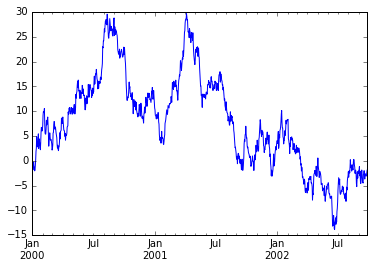

In [44]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
